# CS-433 Machine Learning
## Project 1 : The Higgs Boson Challenge

Christian Abbet, Patryk Oleniuk, Gaétan Ramet

We first start by loading our training data and splitting it in a training set (80%) and a validation set (20%)

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scripts.implementations as lib  # Add personal library
import scripts.proj1_helpers as helper  # Add personal library
import scripts.ml as ml # Add personal library

%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=4)

DATA_FOLDER = 'data'
DATA_TRAIN = os.path.join(DATA_FOLDER, 'train.csv')
DATA_TEST = os.path.join(DATA_FOLDER, 'test.csv')

y, x, ids, header = helper.load_csv_data(DATA_TRAIN)
y_train, x_train,  y_validation, x_validation = lib.sep_valid_train_data(x,y, 0.8);


# 1. Data Exploration and Cleaning 


## 1.1 Data Exploration

We first load the data to see what is the repartition of the data. The two possible classes in for the measurements are `s` for signal, indicating the presence of a Higgs boson and `b` for backgroud noise. In this case around 2/3 of the data (65.73%) is labeled as background.

In [2]:
print('Repartition of {} labels, s: {:.2f}%, b: {:.2f}%'.format(
    len(y_train), np.mean(y_train==1)*100, np.mean(y_train==-1)*100))

Repartition of 200000 labels, s: 34.37%, b: 65.63%


According to [the Higgs boson machine learning challenge](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf) some variable are indicated as "may be undefined" when it can happen that they are meaning-
less or cannot be computed. In this case, their value is set to -999.0, which is outside the normal range of all variables. We will set them to NaN so they will be easier to handle.

In [3]:
x_train[x_train == -999] = np.nan
x_validation[x_validation == -999] = np.nan

Let's now take a look at the repartition of the NaN along the features. We can see that some features seems to have the same amount of NaN value. The second graph shows that some features seems to have NaNs values axactly at the same location. We distinguish here 4 different kind of nan distributions: For some feature, we have a high proportions of nans, while for others, it is very low and we don't even see it on the plot. Having so many NaNs in our data lead us to think we can propably use them in some way

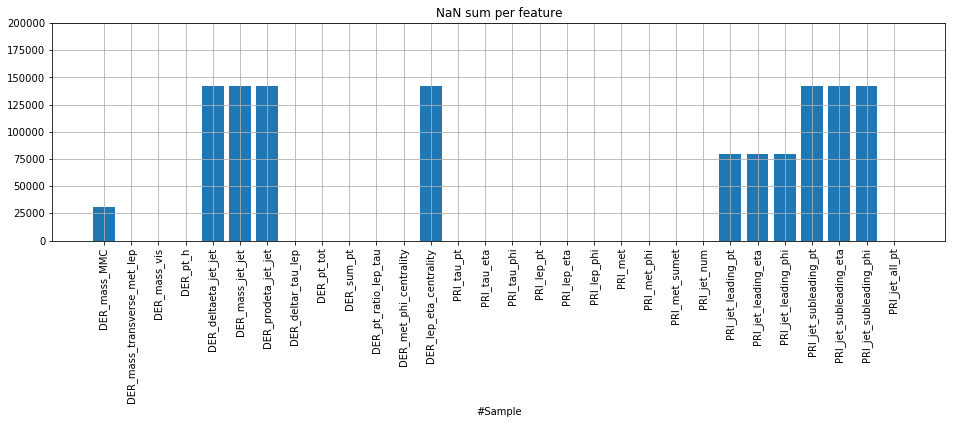

In [4]:
plt.figure(figsize=(16,4))
plt.bar(np.arange(len(header)), np.sum(np.isnan(x_train), axis=0))
plt.xticks(np.arange(len(header)), header, rotation='vertical')
plt.ylim(0, len(y_train)); plt.xlabel('Features'); plt.xlabel('#Sample'); plt.title('NaN sum per feature')
plt.grid(); plt.show();

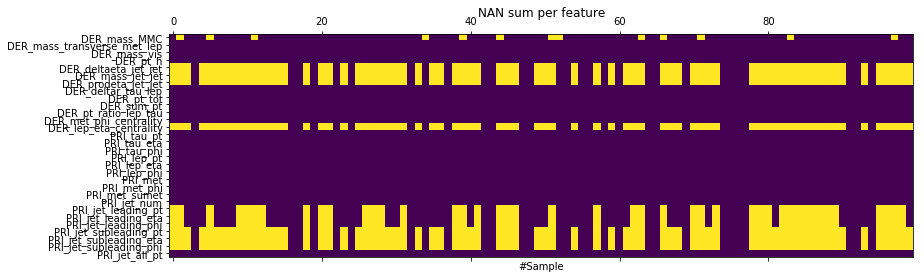

In [5]:
plt.figure(figsize=(14, 20))
plt.matshow(np.isnan(x_train)[:100, :].T)
plt.yticks(np.arange(len(header)), header)
plt.xlabel('Features'); plt.xlabel('#Sample'); plt.title('NAN sum per feature')
plt.show(); 

Does the NaN value gave us any information (`s` or `b`) ? We can see that for some features, the presence of Nan values seems to change the repartition of signal and background measurement : this means that we can use information from the presence of NaNs for classification

In [6]:

for i,feature in enumerate(x_train.T):
    print('Feature {:d} : NaN is present, s: {:.2f}, b: {:.2f}'.format(i,
        np.mean((y_train[(np.isnan(feature))] == 1)),
        np.mean((y_train[(np.isnan(feature))] == -1))))
    print('Feature {:d} : NaN is NOT present, s: {:.2f}, b: {:.2f}'.format(i,
        np.mean((y_train[~(np.isnan(feature))] == 1)),
        np.mean((y_train[~(np.isnan(feature))] == -1))))
    pass
print('NaN is present, s: {:.2f}, b: {:.2f}'.format(
     np.mean(y_train[np.any(np.isnan(x_train), axis=1)] == 1), 
     np.mean(y_train[np.any(np.isnan(x_train), axis=1)] == -1)))
print('NaN is not present, s: {:.2f}, b: {:.2f}'.format(
     np.mean(y_train[~np.any(np.isnan(x_train), axis=1)] == 1), 
     np.mean(y_train[~np.any(np.isnan(x_train), axis=1)] == -1)))

#for i, feature in enumerate(x_train.T):
#    print(' Feature {:d}: NaN is present, s: {:.2f}, b: {:.2f}'.format(i,
#        np.mean(y_train[np.any(np.isnan(feature), axis=0)] == 1), 
#        np.mean(y_train[np.any(np.isnan(feature), axis=0)] == -1)))
#    print(' Feature {:d} : NaN is not present, s: {:.2f}, b: {:.2f}'.format(i,
#        np.mean(y_train[~np.any(np.isnan(feature), axis=0)] == 1), 
#        np.mean(y_train[~np.any(np.isnan(feature), axis=0)] == -1)))

Feature 0 : NaN is present, s: 0.08, b: 0.92
Feature 0 : NaN is NOT present, s: 0.39, b: 0.61
Feature 1 : NaN is present, s: nan, b: nan
Feature 1 : NaN is NOT present, s: 0.34, b: 0.66
Feature 2 : NaN is present, s: nan, b: nan
Feature 2 : NaN is NOT present, s: 0.34, b: 0.66
Feature 3 : NaN is present, s: nan, b: nan
Feature 3 : NaN is NOT present, s: 0.34, b: 0.66
Feature 4 : NaN is present, s: 0.30, b: 0.70
Feature 4 : NaN is NOT present, s: 0.45, b: 0.55
Feature 5 : NaN is present, s: 0.30, b: 0.70
Feature 5 : NaN is NOT present, s: 0.45, b: 0.55
Feature 6 : NaN is present, s: 0.30, b: 0.70
Feature 6 : NaN is NOT present, s: 0.45, b: 0.55
Feature 7 : NaN is present, s: nan, b: nan
Feature 7 : NaN is NOT present, s: 0.34, b: 0.66
Feature 8 : NaN is present, s: nan, b: nan
Feature 8 : NaN is NOT present, s: 0.34, b: 0.66
Feature 9 : NaN is present, s: nan, b: nan
Feature 9 : NaN is NOT present, s: 0.34, b: 0.66
Feature 10 : NaN is present, s: nan, b: nan
Feature 10 : NaN is NOT pres

C:\Users\Gaet_2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Gaet_2\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Feature 13 : NaN is NOT present, s: 0.34, b: 0.66
Feature 14 : NaN is present, s: nan, b: nan
Feature 14 : NaN is NOT present, s: 0.34, b: 0.66
Feature 15 : NaN is present, s: nan, b: nan
Feature 15 : NaN is NOT present, s: 0.34, b: 0.66
Feature 16 : NaN is present, s: nan, b: nan
Feature 16 : NaN is NOT present, s: 0.34, b: 0.66
Feature 17 : NaN is present, s: nan, b: nan
Feature 17 : NaN is NOT present, s: 0.34, b: 0.66
Feature 18 : NaN is present, s: nan, b: nan
Feature 18 : NaN is NOT present, s: 0.34, b: 0.66
Feature 19 : NaN is present, s: nan, b: nan
Feature 19 : NaN is NOT present, s: 0.34, b: 0.66
Feature 20 : NaN is present, s: nan, b: nan
Feature 20 : NaN is NOT present, s: 0.34, b: 0.66
Feature 21 : NaN is present, s: nan, b: nan
Feature 21 : NaN is NOT present, s: 0.34, b: 0.66
Feature 22 : NaN is present, s: nan, b: nan
Feature 22 : NaN is NOT present, s: 0.34, b: 0.66
Feature 23 : NaN is present, s: 0.26, b: 0.74
Feature 23 : NaN is NOT present, s: 0.40, b: 0.60
Feature 

We can also take a look at the feature ranges. it can give us insights of the data. We can see that features (16), (19), (21), (26) and (29) are actually angles (range in $[-\pi, \pi]$). To be certain we checked it directly on the documentation. We decided to also use cosines and sines of these angles as features, as they might be relevant for classification. Note that we are ignoring the NaN values to compute the min and max.

We have to be careful with those results since the output gives us no imformation about the data distribution!

In [7]:
print("Base Features: \n")
for i, feature in enumerate(x_train.T):
    print('Feature {} - {} has range: [{:.4f}, {:.4f}]'.format(
        i+1, header[i], np.nanmin(feature), np.nanmax(feature)))

Base Features: 

Feature 1 - DER_mass_MMC has range: [9.0440, 1192.0260]
Feature 2 - DER_mass_transverse_met_lep has range: [0.0000, 595.8190]
Feature 3 - DER_mass_vis has range: [6.4620, 1329.9130]
Feature 4 - DER_pt_h has range: [0.0000, 1053.8070]
Feature 5 - DER_deltaeta_jet_jet has range: [0.0000, 8.5030]
Feature 6 - DER_mass_jet_jet has range: [13.6020, 4974.9790]
Feature 7 - DER_prodeta_jet_jet has range: [-18.0660, 16.6900]
Feature 8 - DER_deltar_tau_lep has range: [0.2080, 5.6840]
Feature 9 - DER_pt_tot has range: [0.0000, 513.6590]
Feature 10 - DER_sum_pt has range: [46.1040, 1852.4620]
Feature 11 - DER_pt_ratio_lep_tau has range: [0.0470, 19.7730]
Feature 12 - DER_met_phi_centrality has range: [-1.4140, 1.4140]
Feature 13 - DER_lep_eta_centrality has range: [0.0000, 1.0000]
Feature 14 - PRI_tau_pt has range: [20.0000, 622.8620]
Feature 15 - PRI_tau_eta has range: [-2.4990, 2.4970]
Feature 16 - PRI_tau_phi has range: [-3.1420, 3.1420]
Feature 17 - PRI_lep_pt has range: [26.00

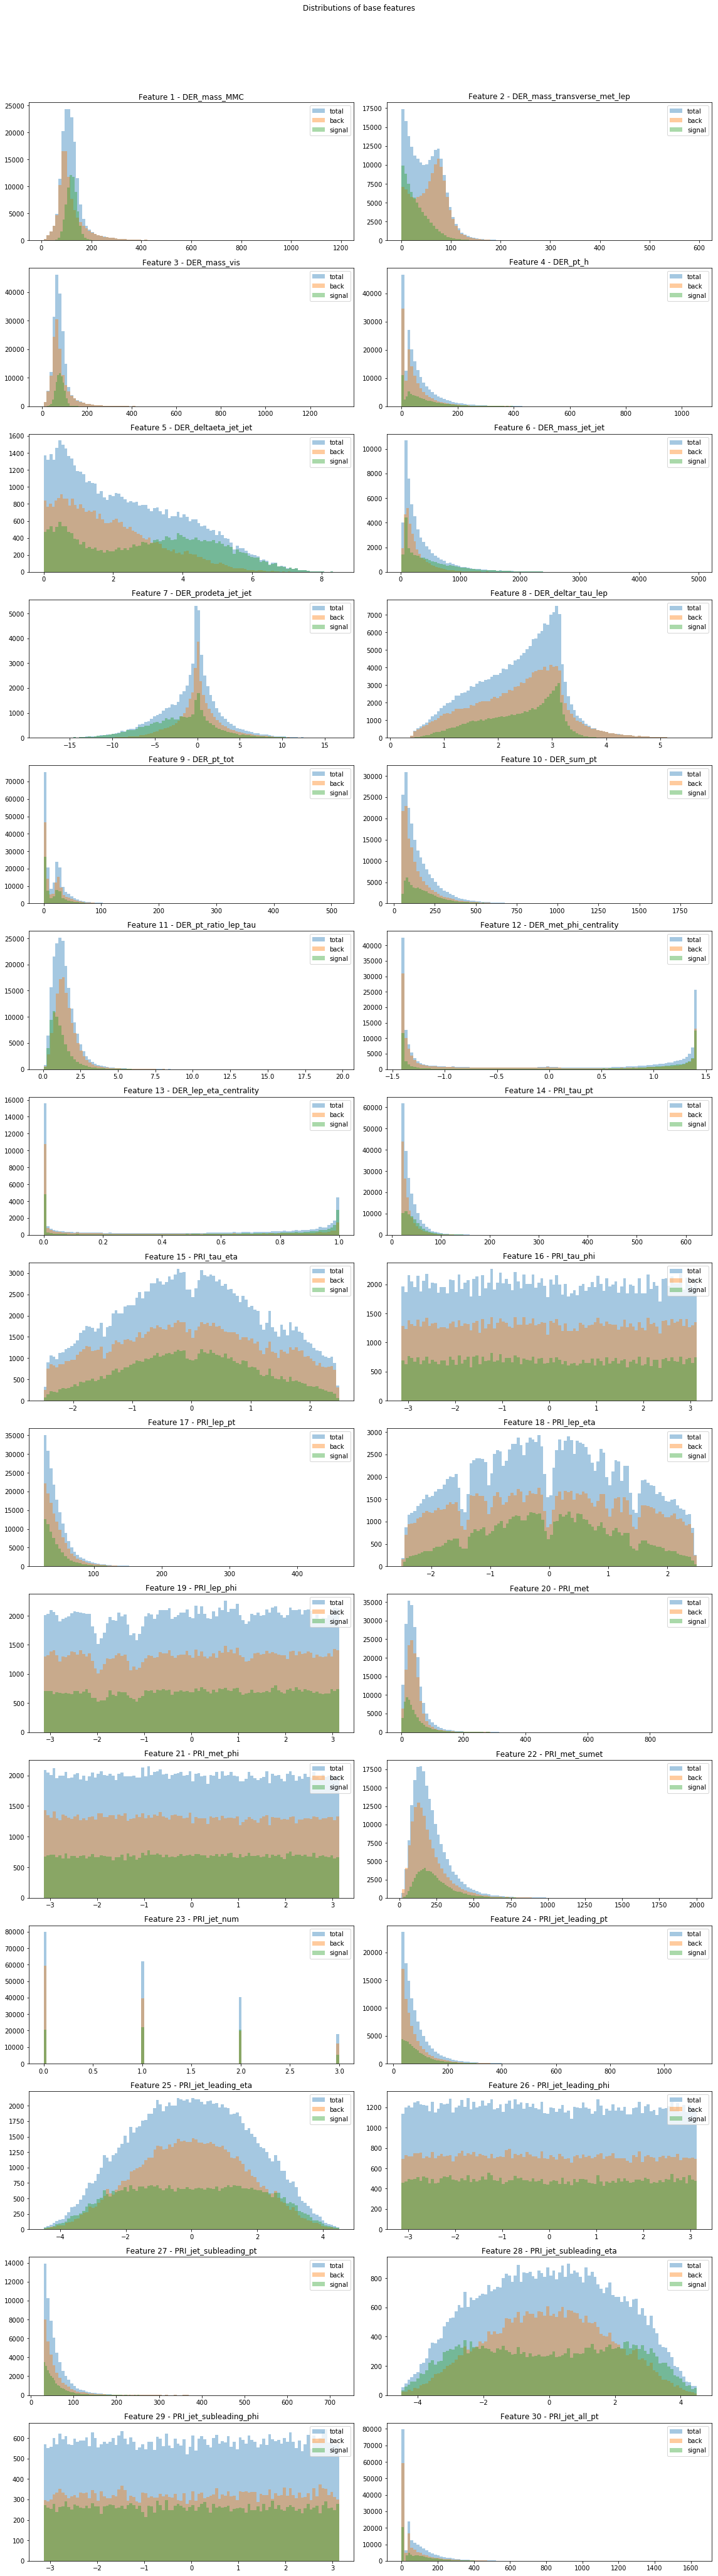

In [8]:
plt.figure(figsize=(16,60))

for i, feature in enumerate(x_train.T):
    plt.subplot(15, 2, i+1)
    id_keep = ~np.isnan(feature)
    id_b = np.logical_and(y_train == -1, id_keep)
    id_s = np.logical_and(y_train == 1, id_keep)
    plt.hist(feature[id_keep], bins=100, alpha=0.4, label='total')
    plt.hist(feature[id_b], alpha=0.4, bins=100, label='back')
    plt.hist(feature[id_s], alpha=0.4, bins=100, label='signal')
    plt.title('Feature {} - {}'.format(i+1, header[i]))
    plt.legend()
plt.suptitle("Distributions of base features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


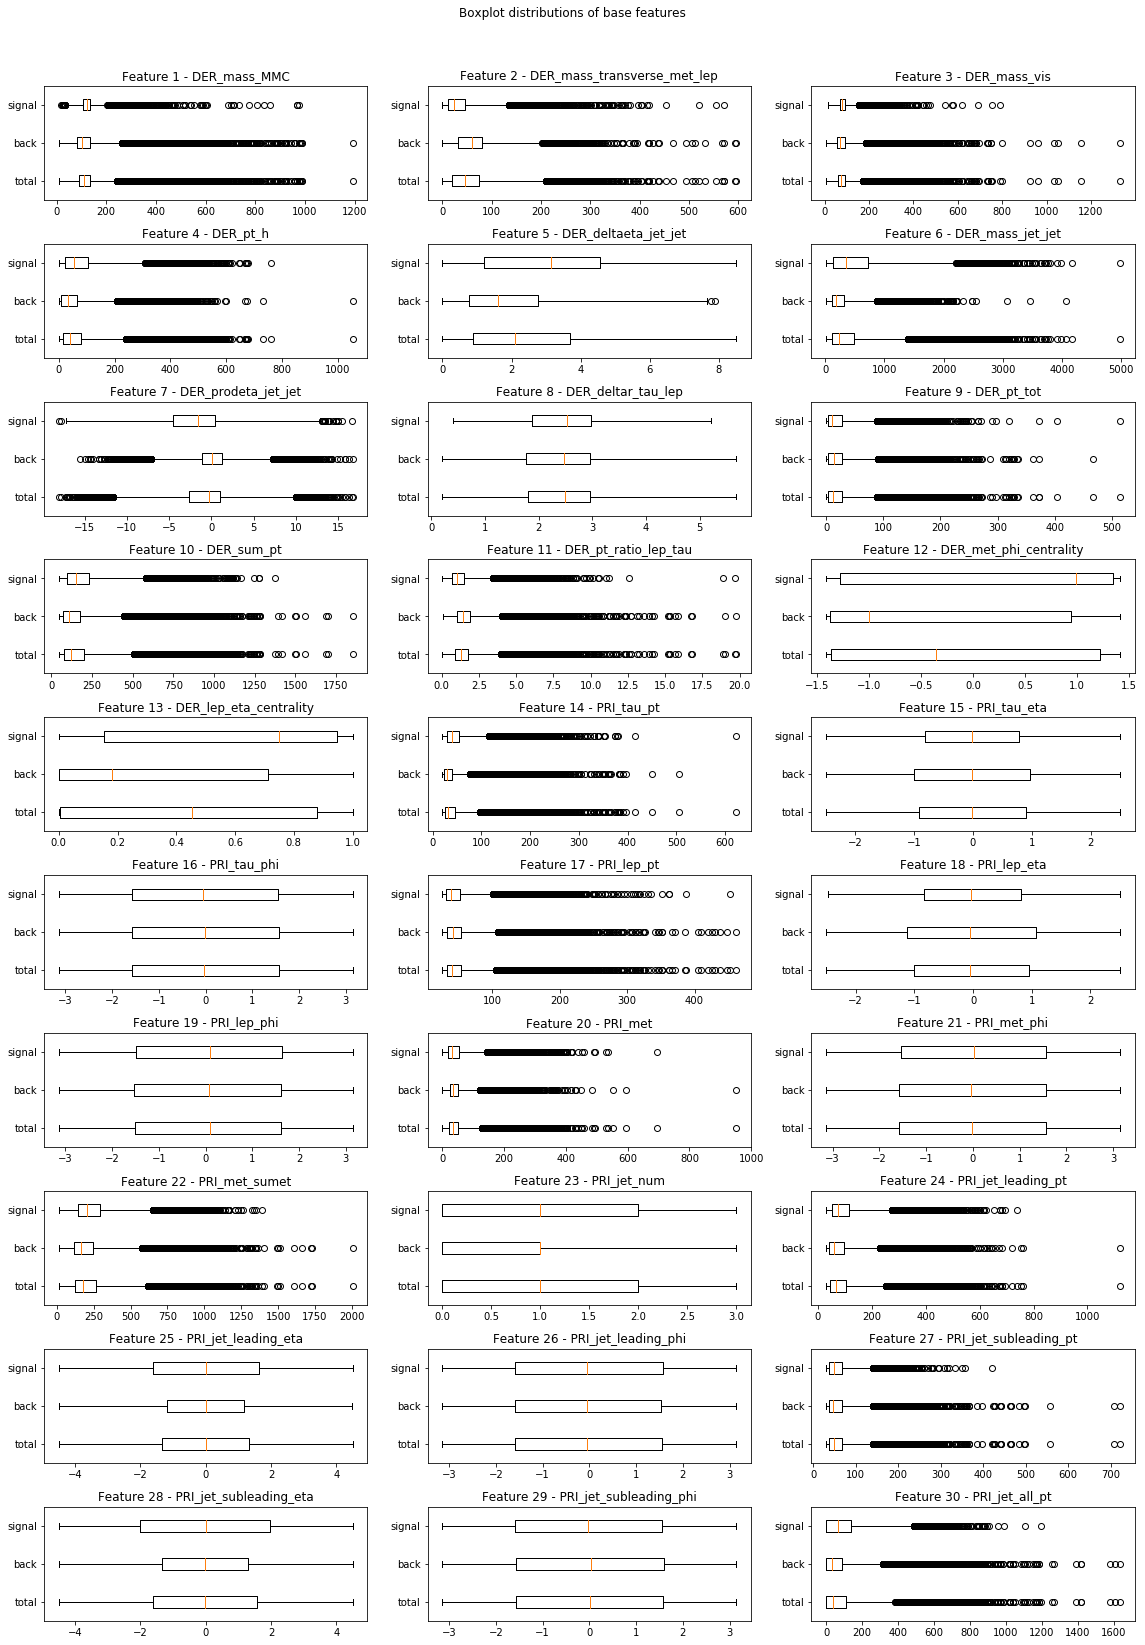

In [9]:
plt.figure(figsize=(16,24))

for i, feature in enumerate(x_train.T):
    plt.subplot(10, 3, i+1)
    id_keep = ~np.isnan(feature)
    id_b = np.logical_and(y_train == -1, id_keep)
    id_s = np.logical_and(y_train == 1, id_keep)
    plt.boxplot([feature[id_keep], feature[id_b], feature[id_s]], whis=2.5, 
                vert=False, labels=['total', 'back', 'signal'])
    plt.title('Feature {} - {}'.format(i+1, header[i]))
plt.suptitle("Boxplot distributions of base features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


## 1.4 Feature augmentation

We will now use the information gathered in previous section to generate new features that are more helpful for classification. First, we will start working with the angles, by adding new features that are the cosines and sines of each angle.

In [10]:
id_angle = [15, 18, 20, 25, 28] # The ids of the features that are angles
x_aug, header = ml.augmented_feat_angle(x_train, id_angle, header)

for i, feature in enumerate(x_aug.T):
    print('Feature {} - {} has range: [{:.4f}, {:.4f}]'.format(
        i+1, header[i], np.nanmin(feature), np.nanmax(feature)))

Feature 1 - DER_mass_MMC has range: [9.0440, 1192.0260]
Feature 2 - DER_mass_transverse_met_lep has range: [0.0000, 595.8190]
Feature 3 - DER_mass_vis has range: [6.4620, 1329.9130]
Feature 4 - DER_pt_h has range: [0.0000, 1053.8070]
Feature 5 - DER_deltaeta_jet_jet has range: [0.0000, 8.5030]
Feature 6 - DER_mass_jet_jet has range: [13.6020, 4974.9790]
Feature 7 - DER_prodeta_jet_jet has range: [-18.0660, 16.6900]
Feature 8 - DER_deltar_tau_lep has range: [0.2080, 5.6840]
Feature 9 - DER_pt_tot has range: [0.0000, 513.6590]
Feature 10 - DER_sum_pt has range: [46.1040, 1852.4620]
Feature 11 - DER_pt_ratio_lep_tau has range: [0.0470, 19.7730]
Feature 12 - DER_met_phi_centrality has range: [-1.4140, 1.4140]
Feature 13 - DER_lep_eta_centrality has range: [0.0000, 1.0000]
Feature 14 - PRI_tau_pt has range: [20.0000, 622.8620]
Feature 15 - PRI_tau_eta has range: [-2.4990, 2.4970]
Feature 16 - PRI_tau_phi has range: [-3.1420, 3.1420]
Feature 17 - PRI_lep_pt has range: [26.0000, 461.8960]
Fea

We will now try to generate new meaningful features by multiplying together the basic features and evaluating the difference between the median of the signal data and the background data for each new feature to determine which one are relevant:

In [11]:
dim = x_aug.shape[1]
m_b = np.zeros((dim, dim)) # the background medians
m_s = np.zeros((dim, dim)) # the signal medians
m_d = np.zeros((dim, dim)) # the difference medians

for i, f1 in enumerate(x_aug.T):
    for j, f2 in enumerate(x_aug.T):
        if i == j:
            f_res = f1
        else:
            f_res = f1*f2
        id_keep = ~np.isnan(f_res)
        id_b = np.logical_and(y_train == -1, id_keep)
        id_s = np.logical_and(y_train == 1, id_keep)
        f_norm = (f_res-np.nanmean(f_res))/np.nanstd(f_res) # We normalize the features
        m_b[i,j] = np.median(f_norm[id_b])
        m_s[i,j] = np.median(f_norm[id_s])
        m_d[i,j] = np.median(f_norm[id_b]) - np.median(f_norm[id_s])

We also want to enforce the new features to be different from the old feature, so we penalize the median difference of the new feature by the one of it's first component in the product

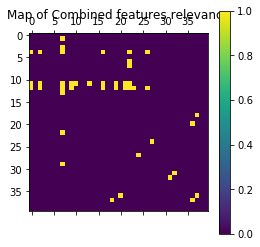

In [12]:
plt.figure(figsize=(16, 4))
plt.matshow(np.abs(m_d)-np.abs(np.diag(m_d)) > 0.4) 
plt.colorbar()
plt.title('Map of Combined features relevance')
plt.show()

Having a look at the new features distributions allows us to see that they separate signal from background much better than the base features.

In [13]:
tresh_id = np.nonzero((np.abs(m_d)-np.abs(np.diag(m_d))).flatten() > 0.4)
res = np.unravel_index(tresh_id, (dim, dim))
combs = np.array(res).reshape((2,-1)).T

# Take only unique pairs
combs = np.sort(combs, axis=1)
combs = list(set([tuple(row) for row in combs]))

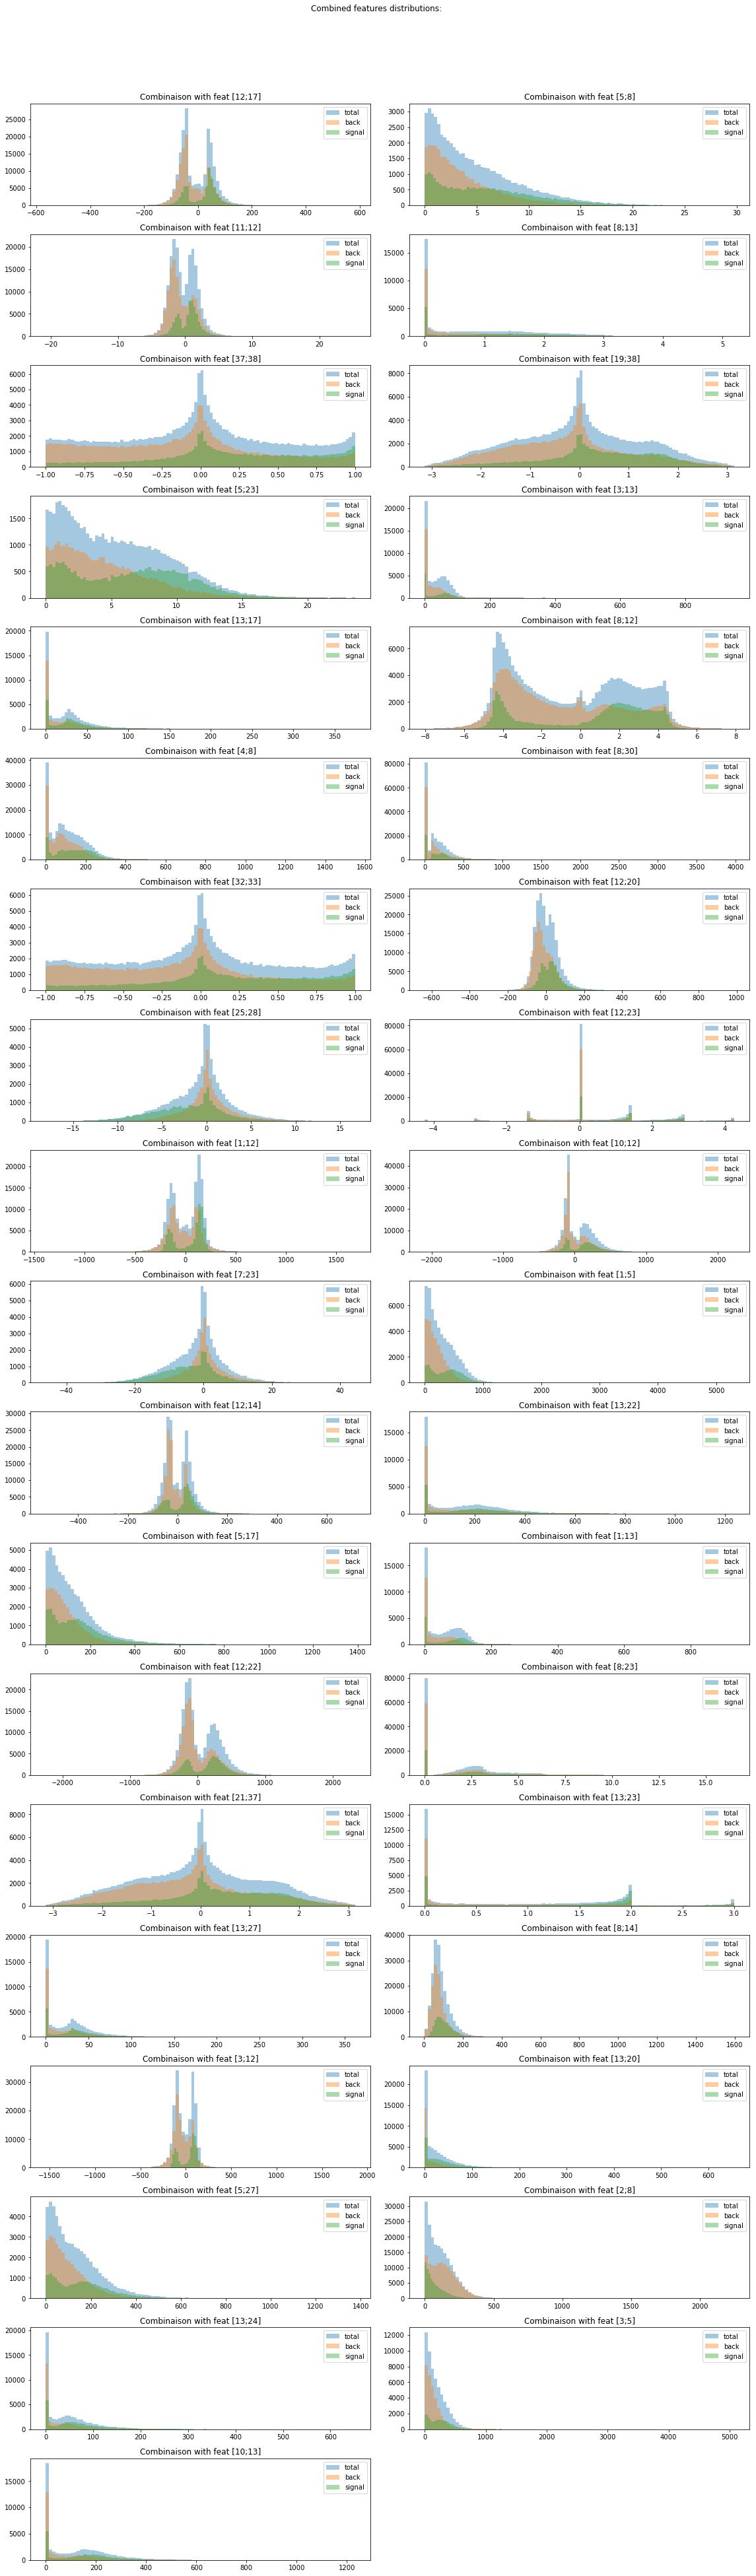

In [14]:


n_lines = np.ceil(len(combs)/2)
plt.figure(figsize=(16, 3*n_lines))

for i, comb in enumerate(combs):
    plt.subplot(n_lines, 2, i+1)
    
    f1 = x_aug[:, comb[0]]
    f2 = x_aug[:, comb[1]]
    ft = f1*f2

    id_keep = ~np.isnan(ft)
    id_b = np.logical_and(y_train == -1, id_keep)
    id_s = np.logical_and(y_train == 1, id_keep)

    plt.hist(ft[id_keep], bins=100, alpha=0.4, label='total')
    plt.hist(ft[id_b], alpha=0.4, bins=100, label='back')
    plt.hist(ft[id_s], alpha=0.4, bins=100, label='signal')
    plt.title('Combinaison with feat [{};{}]'.format(comb[0]+1, comb[1]+1))
    plt.legend()
plt.suptitle('Combined features distributions: ')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Now, we will also add the features based on the nan distributions as discussed above and normalize the data. For each of the 3 types of Nan distributions we will set the value of the NAN-feature to 1 if the initial feature is nan, and to -1 if it was not a Nan

In [15]:
id_nan = [0, 24, 27]
x_aug, header = ml.add_nan_feature(x_aug, id_nan, header)

for i, feature in enumerate(x_aug.T):
    print('Feature {} - {} has range: [{:.4f}, {:.4f}]'.format(
        i+1, header[i], np.nanmin(feature), np.nanmax(feature)))

Feature 1 - DER_mass_MMC has range: [9.0440, 1192.0260]
Feature 2 - DER_mass_transverse_met_lep has range: [0.0000, 595.8190]
Feature 3 - DER_mass_vis has range: [6.4620, 1329.9130]
Feature 4 - DER_pt_h has range: [0.0000, 1053.8070]
Feature 5 - DER_deltaeta_jet_jet has range: [0.0000, 8.5030]
Feature 6 - DER_mass_jet_jet has range: [13.6020, 4974.9790]
Feature 7 - DER_prodeta_jet_jet has range: [-18.0660, 16.6900]
Feature 8 - DER_deltar_tau_lep has range: [0.2080, 5.6840]
Feature 9 - DER_pt_tot has range: [0.0000, 513.6590]
Feature 10 - DER_sum_pt has range: [46.1040, 1852.4620]
Feature 11 - DER_pt_ratio_lep_tau has range: [0.0470, 19.7730]
Feature 12 - DER_met_phi_centrality has range: [-1.4140, 1.4140]
Feature 13 - DER_lep_eta_centrality has range: [0.0000, 1.0000]
Feature 14 - PRI_tau_pt has range: [20.0000, 622.8620]
Feature 15 - PRI_tau_eta has range: [-2.4990, 2.4970]
Feature 16 - PRI_tau_phi has range: [-3.1420, 3.1420]
Feature 17 - PRI_lep_pt has range: [26.0000, 461.8960]
Fea

Finally, we will add the combined features we designed earlier and remove the angles as we already use their cos and sin that are more meaningful

In [16]:
x_aug = ml.add_features(x_aug, combs) # add features that are product of other features
x_aug = ml.remove_useless(x_aug, id_useless=id_angle) #remove the angles as we used their cos and sin

As a last step we will normalize all our features as if they were normally distributed, even though some are not and set the nan measures to 0 (mean value) so that the don't influence the prediction. We deal with outliers by thresholding them to 2.5 $\sigma$ (the standard deviation)

In [17]:
distrib = ['g']*(x_aug.shape[1])
x_aug, mean_train, std_train, max_train = ml.normalize_outliers(x_aug, distrib) #normalize all the features as gaussian
x_aug = np.nan_to_num(x_aug) #put all nans to 0 (mean value) so that they don't influence the predictions
print('\nStd:', np.std(x_aug, axis=0), '\nn_feat', x_aug.shape[1])

C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\ml.py:68: RuntimeWarning: invalid value encountered in less
  mean_update = np.nanmean(feature[np.abs(feat_cent) < maxval])
C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\ml.py:69: RuntimeWarning: invalid value encountered in less
  std_update = np.nanstd(feature[np.abs(feat_cent) < maxval])
C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\ml.py:71: RuntimeWarning: invalid value encountered in greater
  feat_final[feat_final > maxval] = maxval
C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\ml.py:72: RuntimeWarning: invalid value encountered in less
  feat_final[feat_final < -maxval] = -maxval



Std: [ 1.074   1.0408  1.1532  1.1364  0.5519  0.6304  0.5907  1.0192  1.1146
  1.1341  1.1064  1.      0.5399  1.1454  1.      1.1456  1.      1.1392
  1.1057  1.      0.89    0.7758  0.6201  0.5399  1.1287  1.      1.      1.
  0.7753  0.5399  1.      1.      1.      0.7753  0.5399  1.      1.      1.
  1.0366  0.587   1.0436  0.5493  1.      1.0006  0.5589  0.5653  0.5932
  1.0003  1.0565  1.1073  1.      1.0791  0.5907  1.0823  0.9597  1.0689
  0.59    0.5514  1.0475  0.572   0.606   0.5444  1.0413  1.0791  1.0014
  0.5399  0.5878  1.0917  1.0436  0.6118  0.5923  1.0661  0.6012  0.5752
  0.5796] 
n_feat 75


Let's quickly apply the same treatment to our validation set :

In [18]:
# normalize features
x_aug_val = x_validation.copy()
x_aug_val, _ = ml.augmented_feat_angle(x_aug_val, id_angle, header)
x_aug_val, _ = ml.add_nan_feature(x_aug_val, id_nan, header)
x_aug_val = ml.add_features(x_aug_val, combs)
x_aug_val = ml.remove_useless(x_aug_val, id_useless=id_angle)
x_aug_val = ml.normalize_outliers_feed(x_aug_val, mean_train, std_train, max_train, distrib)
x_aug_val = np.nan_to_num(x_aug_val)
print('\nStd:', np.std(x_aug_val, axis=0), '\nn_feat', x_aug_val.shape[1])


Std: [ 1.0809  1.0384  1.1548  1.134   0.5455  0.6189  0.5829  1.0176  1.106
  1.1246  1.1044  1.0038  0.5337  1.1372  1.0017  1.1371  1.0049  1.1418
  1.103   0.9936  0.8915  0.7739  0.6114  0.5313  1.1198  1.0002  0.9983
  0.9979  0.7729  0.5312  0.9998  1.0017  1.0021  0.7734  0.5365  0.9993
  1.0014  0.9934  1.0368  0.5769  1.0485  0.5396  1.0019  1.009   0.5531
  0.557   0.5846  1.0066  1.0561  1.0976  0.9951  1.0809  0.5829  1.0742
  0.9645  1.0647  0.5826  0.5512  1.0471  0.5661  0.5967  0.5403  1.0385
  1.0747  1.0016  0.5329  0.5813  1.0816  1.0496  0.6188  0.5797  1.0659
  0.6016  0.5704  0.575 ] 
n_feat 75


C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\ml.py:88: RuntimeWarning: invalid value encountered in greater
  feat_final[feat_final > maxval]  = maxval
C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\ml.py:89: RuntimeWarning: invalid value encountered in less
  feat_final[feat_final < -maxval] = -maxval


# 2. Model fitting

## 2.1 Least Squares (Normal equations)

In [19]:
weights_ls, degree_ls = lib.test_least_squares(
    x_aug, y_train, x_aug_val, y_validation, degrees = np.linspace(1,6,6))

degree=1, Training RMSE=0.792, Testing RMSE=0.790
train acc :  0.77622
validation acc :  0.77718
degree=2, Training RMSE=22.488, Testing RMSE=21.999
train acc :  0.50827
validation acc :  0.51364
degree=3, Training RMSE=2.193, Testing RMSE=2.152
train acc :  0.65777
validation acc :  0.66238
degree=4, Training RMSE=38.110, Testing RMSE=37.274
train acc :  0.577725
validation acc :  0.5786
degree=5, Training RMSE=11.853, Testing RMSE=11.721
train acc :  0.533445
validation acc :  0.53644
degree=6, Training RMSE=30.767, Testing RMSE=30.167
train acc :  0.48
validation acc :  0.47368
Best params for Least Squares : degree =  1 , accuracy =  0.77718


## 2.2 Least Squares (Gradient Descent)

In [20]:
weights_ls, degree_ls = lib.test_least_squares(
    x_aug, y_train, x_aug_val, y_validation, degrees = np.linspace(1,6,6), mode='GD')

Gradient Descent 200 iter: loss=0.4361020191900806
degree=1, Training RMSE=0.934, Testing RMSE=0.934
train acc :  0.68146
validation acc :  0.67906
Gradient Descent 200 iter: loss=0.3562771322797528
degree=2, Training RMSE=0.844, Testing RMSE=0.842
train acc :  0.744605
validation acc :  0.74802
Gradient Descent 200 iter: loss=0.3407162120615513
degree=3, Training RMSE=0.825, Testing RMSE=0.824
train acc :  0.76542
validation acc :  0.76702
Gradient Descent 200 iter: loss=0.3311226615151536
degree=4, Training RMSE=0.814, Testing RMSE=0.812
train acc :  0.76865
validation acc :  0.77196
Gradient Descent 200 iter: loss=1.0884596115069942e+286
degree=5, Training RMSE=147543865443941394290918250480275878341515857787826136187436186458080318831358560914328852899748637385084967259911592977878563908486195486654464.000, Testing RMSE=221141532176186473405467209072289216156997977264574552979254886342814631674828682392437306388708949704561485834982671144448439046992449230602240.000
train acc :  0.

C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\implementations.py:183: RuntimeWarning: invalid value encountered in sign
  y_pred_s = np.sign(y_pred)


## 2.3 Least Squares (Stochastic Gradient Descent)

In [21]:
weights_ls, degree_ls = lib.test_least_squares(
    x_aug, y_train, x_aug_val, y_validation, degrees = np.linspace(1,6,6), mode='SGD')

SGD (batch, iter) = (100, 199): loss=0.4348993286131391
degree=1, Training RMSE=0.933, Testing RMSE=0.933
train acc :  0.68469
validation acc :  0.68176
SGD (batch, iter) = (100, 199): loss=0.356078926092692
degree=2, Training RMSE=0.844, Testing RMSE=0.842
train acc :  0.736435
validation acc :  0.73978
SGD (batch, iter) = (100, 199): loss=0.342819045536856
degree=3, Training RMSE=0.828, Testing RMSE=0.826
train acc :  0.762205
validation acc :  0.76402
SGD (batch, iter) = (100, 199): loss=5.8476002739665e+19
degree=4, Training RMSE=10814435051.325, Testing RMSE=10799964065.707
train acc :  0.56803
validation acc :  0.56736
SGD (batch, iter) = (100, 199): loss=6.329375878397139e+250
degree=5, Training RMSE=355791396140973026176697796710582213755109333407139715982722579988719607004932281529843050262835134986175279184877275691614208.000, Testing RMSE=657530686841256823958041763239024420247865828464046730166009279936790532530479486447441001894430692468183740718983010200846336.000
train a

C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\implementations.py:183: RuntimeWarning: invalid value encountered in sign
  y_pred_s = np.sign(y_pred)


## 2.4 Ridge Regression

For Ridge Regression, we sweeped the degrees from 6 to 13 and the regularize $\lambda$ from $10^{-8}$ to $10^2$. Here, for the sake of speed, we execute a smaller sweep which gives us 83.34% validation accuracy at degree 10 and $\lambda=5.45 * 10^{-6}$

degree=10, lambda=0.000, Training RMSE=9.998, Testing RMSE=9.999
train acc :  0.514635
validation acc :  0.51538
degree=10, lambda=0.000, Training RMSE=2.025, Testing RMSE=2.030
train acc :  0.58791
validation acc :  0.5878
degree=10, lambda=0.000, Training RMSE=3.869, Testing RMSE=3.852
train acc :  0.54225
validation acc :  0.5406
degree=10, lambda=0.000, Training RMSE=5.875, Testing RMSE=5.856
train acc :  0.531005
validation acc :  0.53112
degree=10, lambda=0.000, Training RMSE=14.510, Testing RMSE=14.449
train acc :  0.493505
validation acc :  0.49494
degree=10, lambda=0.000, Training RMSE=2.650, Testing RMSE=2.640
train acc :  0.567675
validation acc :  0.5677
degree=10, lambda=0.000, Training RMSE=0.791, Testing RMSE=0.791
train acc :  0.80403
validation acc :  0.80486
degree=10, lambda=0.000, Training RMSE=0.711, Testing RMSE=0.713
train acc :  0.82985
validation acc :  0.83044
degree=10, lambda=0.000, Training RMSE=0.704, Testing RMSE=0.705
train acc :  0.832105
validation acc

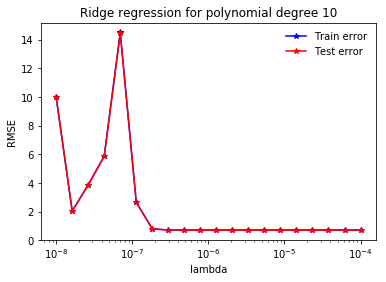

In [22]:
weights_ridge, degree_ridge, lambda_ridge = lib.test_ridge_regression(
    x_aug, y_train, x_aug_val, y_validation, degrees = np.linspace(10,10,1), lambdas=np.logspace(-8,-4, 20))

## 2.5 Logistic Regression

## 2.6 Regularized Logistic Regression

# 3. Model Comparison

# 4. Submission test

We will here take our best model, use it to classify the test data and generate the csv file for submission

In [26]:
#Load data, add feature and normalize
y_test, x_test, ids_test, header = helper.load_csv_data(DATA_TEST)
x_test[x_test == -999] = np.nan

x_aug_test = x_test.copy()
x_aug_test, _ = ml.augmented_feat_angle(x_aug_test, id_angle, header)
x_aug_test, _ = ml.add_nan_feature(x_aug_test, id_nan, header)
x_aug_test = ml.add_features(x_aug_test, combs)
x_aug_test = ml.remove_useless(x_aug_test, id_useless=id_angle)
x_aug_test = ml.normalize_outliers_feed(x_aug_test, mean_train, std_train, max_train, distrib)
x_aug_test = np.nan_to_num(x_aug_test)
print('\nStd:', np.std(x_aug_test, axis=0),'\nn_feat', x_aug_test.shape[1])

C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\ml.py:88: RuntimeWarning: invalid value encountered in greater
  feat_final[feat_final > maxval]  = maxval
C:\Users\Gaet_2\Documents\EPFL\Machine Learning\projet\ML_course\projects\project1\scripts\ml.py:89: RuntimeWarning: invalid value encountered in less
  feat_final[feat_final < -maxval] = -maxval



Std: [ 1.0739  1.0389  1.149   1.1334  0.5516  0.6303  0.5892  1.0158  1.1171
  1.1355  1.107   1.0015  0.5385  1.1449  0.9997  1.1455  1.0002  1.1345
  1.1064  1.0007  0.889   0.7718  0.6213  0.5391  1.1289  0.9991  1.0005
  1.0003  0.7754  0.5394  1.0009  0.9992  0.9997  0.7734  0.5398  0.9992
  1.0005  0.9997  1.0386  0.5883  1.0473  0.5472  0.9993  1.001   0.5594
  0.566   0.5941  1.0026  1.0554  1.1094  1.0007  1.0774  0.5892  1.0828
  0.9623  1.0705  0.5899  0.5546  1.0481  0.5709  0.6038  0.5451  1.0425
  1.0808  1.0004  0.5386  0.5874  1.0877  1.0451  0.6101  0.5913  1.0629
  0.6006  0.5783  0.5797] 
n_feat 75


In [27]:
#Prediction

degree_opt = degree_ridge
weights_opt = weights_ridge

_phi_test = lib.build_poly(x_aug_test, degree_opt)
y_pred = helper.predict_labels(weights_opt, _phi_test)

In [28]:
#Submission
helper.create_csv_submission(ids_test, y_pred, 'final_submit.csv')
print('Results saved ...')

Results saved ...
